<a href="https://colab.research.google.com/github/Malcolm777/Trading_algorithms/blob/master/NVDA_MACD_8_17_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#This program uses the Moving Average Crossover Divergence (MACD) to predict stock price 

In [2]:
#Import the libraries 
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
plt.style.use('fivethirtyeight')

In [20]:
#Import the data
from google.colab import files 
uploaded = files.upload()

Saving NVDA.csv to NVDA.csv


In [25]:
#Get the data 
df = pd.read_csv('NVDA.csv')

#Show the index as the date 
df = df.set_index(pd.DatetimeIndex(df['Date'].values))

#Show the data
df 

,Date,Open,High,Low,Close,Adj Close,Volume
2019-08-19,2019-08-19,164.119995,171.419998,163.470001,170.779999,170.305679,20377800
2019-08-20,2019-08-20,170.559998,170.580002,167.020004,167.869995,167.403748,11579700
2019-08-21,2019-08-21,170.529999,173.449997,169.660004,171.229996,170.754440,10681100
2019-08-22,2019-08-22,171.619995,173.330002,169.899994,171.479996,171.003738,7587200
2019-08-23,2019-08-23,168.399994,170.589996,161.639999,162.440002,161.988861,14201400
...,...,...,...,...,...,...,...
2020-08-11,2020-08-11,442.950012,445.470001,431.829987,434.000000,434.000000,8862800
2020-08-12,2020-08-12,439.630005,458.679993,438.329987,457.609985,457.609985,11623600
2020-08-13,2020-08-13,461.839996,468.869995,454.230011,457.720001,457.720001,9361500
2020-08-14,2020-08-14,461.200012,468.190002,457.619995,462.559998,462.559998,9160900


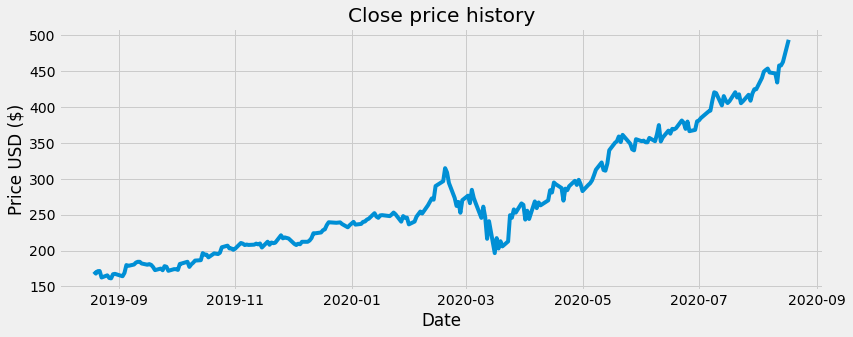

In [26]:
#Visually show the stock price 
plt.figure(figsize=(12.2, 4.5))
plt.plot(df['Close'], label='Close')
plt.title('Close price history')
plt.xlabel('Date')
plt.ylabel('Price USD ($)')
plt.show()

In [27]:
#Calculate the MACD and the single line indicators 

#Calculate the shortEMA 
shortEMA = df.Close.ewm(span=12, adjust=False).mean()

#Calculate the longEMA 
longEMA = df.Close.ewm(span=26, adjust=False).mean()

#Calculate the MACD 
MACD = shortEMA - longEMA 

#Calculate the Signal 
Signal = MACD.ewm(span=9, adjust=False).mean()


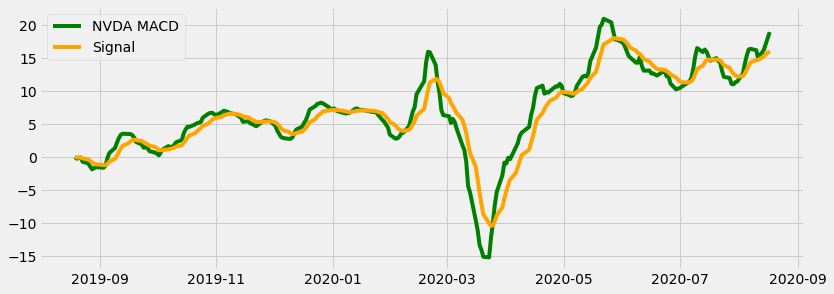

In [29]:
#Plot the chart 
plt.figure(figsize=(12.2, 4.5))
plt.plot(df.index, MACD, label = 'NVDA MACD', color = 'green', alpha=1) 
plt.plot(df.index, Signal, label = 'Signal', color = 'orange', alpha=1)
plt.legend(loc = 'upper left')
plt.show()

In [30]:
#Create the new columns for the data 
df['MACD'] = MACD 
df['Signal line'] = Signal

In [31]:
#Create a function to signal when to buy and sell an asset 
def buy_sell(signal): 
  Buy = []
  Sell = []
  flag = -1 

  for i in range(0, len(signal)): 
    if signal['MACD'][i] > signal['Signal line'][i]: 
      Sell.append(np.nan)
      if flag != 1: 
        Buy.append(signal['Close'][i])
        flag = 1
      else: 
        Buy.append(np.nan)
    elif signal['MACD'][i] < signal['Signal line'][i]: 
      Buy.append(np.nan)
      if flag != 0: 
        Sell.append(signal['Close'][i])
        flag = 0
      else: 
        Sell.append(np.nan)
    else: 
      Buy.append(np.nan)
      Sell.append(np.nan)

  return (Buy, Sell)
  
      

In [32]:
#Create a buy and sell column 
a = buy_sell(df)
df['Buy_Signal_Price'] = a[0] 
df['Sell_Signal_Price'] = a[1]

In [33]:
#Show the data 
df

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal line,Buy_Signal_Price,Sell_Signal_Price
2019-08-19,2019-08-19,164.119995,171.419998,163.470001,170.779999,170.305679,20377800,0.000000,0.000000,NaN,NaN
2019-08-20,2019-08-20,170.559998,170.580002,167.020004,167.869995,167.403748,11579700,-0.232137,-0.046427,NaN,167.869995
2019-08-21,2019-08-21,170.529999,173.449997,169.660004,171.229996,170.754440,10681100,-0.143331,-0.065808,NaN,NaN
2019-08-22,2019-08-22,171.619995,173.330002,169.899994,171.479996,171.003738,7587200,-0.052177,-0.063082,171.479996,NaN
2019-08-23,2019-08-23,168.399994,170.589996,161.639999,162.440002,161.988861,14201400,-0.701305,-0.190727,NaN,162.440002
...,...,...,...,...,...,...,...,...,...,...,...
2020-08-11,2020-08-11,442.950012,445.470001,431.829987,434.000000,434.000000,8862800,14.874643,14.775682,NaN,NaN
2020-08-12,2020-08-12,439.630005,458.679993,438.329987,457.609985,457.609985,11623600,15.523826,14.925311,NaN,NaN
2020-08-13,2020-08-13,461.839996,468.869995,454.230011,457.720001,457.720001,9361500,15.864312,15.113111,NaN,NaN
2020-08-14,2020-08-14,461.200012,468.190002,457.619995,462.559998,462.559998,9160900,16.336381,15.357765,NaN,NaN


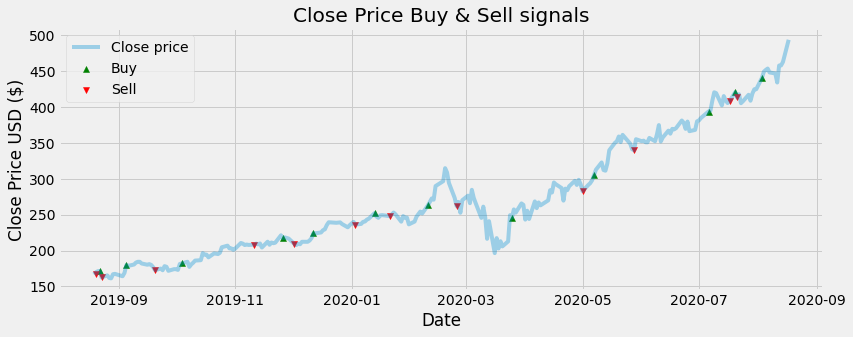

In [34]:
#Visually show the stock buy and sell signals 
plt.figure(figsize=(12.2, 4.5))
plt.scatter(df.index, df['Buy_Signal_Price'], color = 'green', label='Buy', marker='^', alpha = 1)
plt.scatter(df.index, df['Sell_Signal_Price'], color = 'red', label='Sell', marker='v', alpha = 1)
plt.plot(df['Close'], label='Close price', alpha = 0.35) 
plt.title('Close Price Buy & Sell signals')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend(loc = 'upper left')
plt.show()
